In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('netflix_titles.csv')
adf = pd.read_csv('amazon_prime_titles.csv')
ddf = pd.read_csv('disney_plus_titles.csv')
hdf = pd.read_csv('hulu_titles.csv')

# Combine DataFrames
all_df = pd.concat([df, adf, ddf, hdf], ignore_index=True)
# Remove duplicates
all_df = all_df.drop_duplicates()
# Resetting the index after removing duplicates
all_df = all_df.reset_index(drop=True)


print(df.isnull().sum())
print(adf.isnull().sum())
print(ddf.isnull().sum())
print(hdf.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64
show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_

In [2]:
df['duration'].fillna('Unknown', inplace=True)

df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['rating'].fillna('No Rating', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)


adf['duration'].fillna('Unknown', inplace=True)

adf['country'].fillna('Unknown', inplace=True)
adf['director'].fillna('Unknown', inplace=True)
adf['cast'].fillna('No Cast', inplace=True)
adf['rating'].fillna('No Rating', inplace=True)
adf['date_added'].fillna('Unknown', inplace=True)


ddf['duration'].fillna('Unknown', inplace=True)

ddf['country'].fillna('Unknown', inplace=True)
ddf['director'].fillna('Unknown', inplace=True)
ddf['cast'].fillna('No Cast', inplace=True)
ddf['rating'].fillna('No Rating', inplace=True)
ddf['date_added'].fillna('Unknown', inplace=True)

hdf['duration'].fillna('Unknown', inplace=True)

hdf['country'].fillna('Unknown', inplace=True)
hdf['director'].fillna('Unknown', inplace=True)
hdf['cast'].fillna('No Cast', inplace=True)
hdf['rating'].fillna('No Rating', inplace=True)
hdf['date_added'].fillna('Unknown', inplace=True)


print(df.isnull().sum())
print(adf.isnull().sum())
print(ddf.isnull().sum())
print(hdf.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     4
dtype: int64


C:\Users\Xabi0\AppData\Local\Temp\ipykernel_10980\528301036.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No Cast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hdf['cast'].fillna('No Cast', inplace=True)


In [3]:
country_group = df.groupby('country')
a_country_group = adf.groupby('country')
d_country_group = ddf.groupby('country')
h_country_group = hdf.groupby('country')



country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                

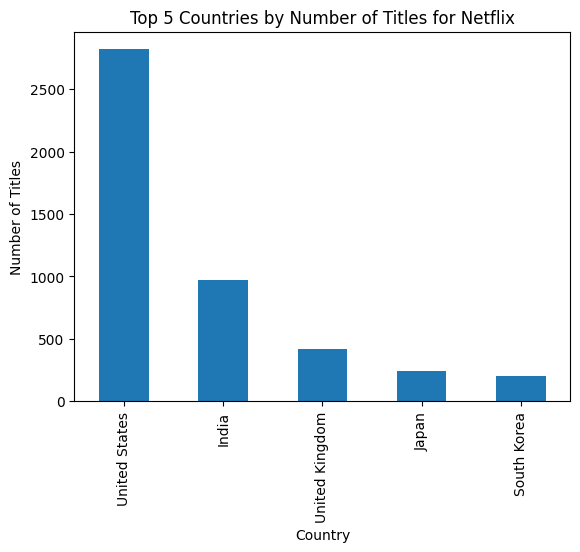

country
United States                                          253
India                                                  229
United Kingdom                                          28
Canada                                                  16
United Kingdom, United States                           12
                                                      ... 
India, United States, United Kingdom, Canada, China      1
India, Sweden                                            1
India, South Africa, Brazil                              1
India, Denmark                                           1
United States, United Kingdom, Kazakhstan                1
Name: title, Length: 86, dtype: int64


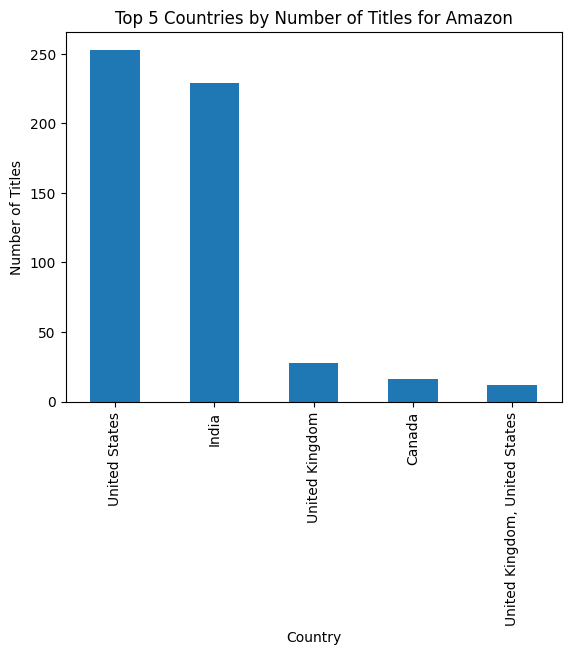

country
United States                                                                      1005
United States, Canada                                                                30
United Kingdom                                                                       23
United States, United Kingdom                                                        22
Canada, United States                                                                17
                                                                                   ... 
South Korea, United States, China, Japan                                              1
Norway, Sweden, United States                                                         1
New Zealand, United States                                                            1
Ireland, United States, Canada, United Kingdom, Denmark, Spain, Poland, Hungary       1
United States, United Kingdom, South Korea                                            1
Name: title, Length: 89,

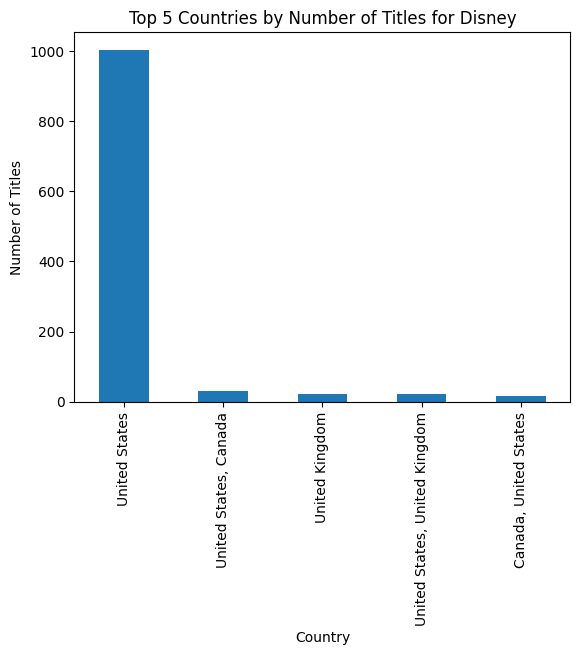

country
United States                                   921
Japan                                           268
United Kingdom                                  113
Canada                                           34
United Kingdom, United States                    26
                                               ... 
Germany, Norway                                   1
Germany, Luxembourg, Denmark, Belgium, China      1
Germany, France, United States                    1
Germany, Czech Republic                           1
Venezuela                                         1
Name: title, Length: 150, dtype: int64


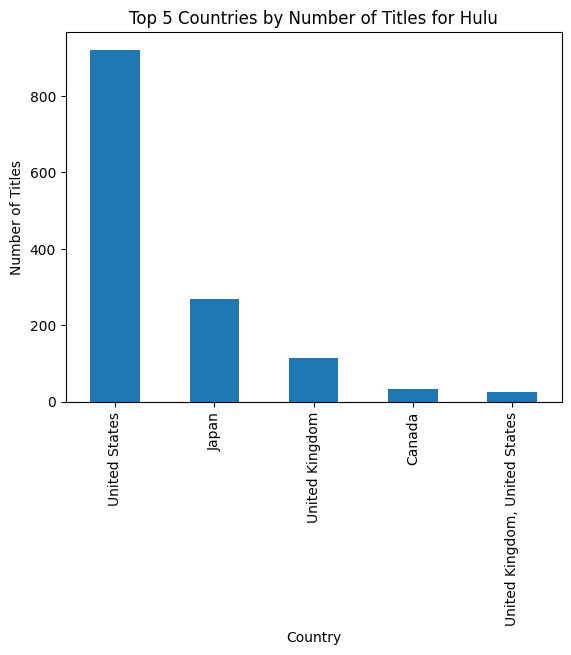

In [4]:
# Filter Out Unknown
df = df[df['country'] != 'Unknown']
adf = adf[adf['country'] != 'Unknown']
ddf = ddf[ddf['country'] != 'Unknown']
hdf = hdf[hdf['country'] != 'Unknown']

country_counts = df.groupby('country')['title'].count().sort_values(ascending=False)
print(country_counts)

# Selecting the top 5 countries
top_5_countries = country_counts.head(5)

# Plotting
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries by Number of Titles for Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

a_country_counts = adf.groupby('country')['title'].count().sort_values(ascending=False)
print(a_country_counts)

# Selecting the top 5 countries
top_5_countries = a_country_counts.head(5)

# Plotting
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries by Number of Titles for Amazon')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


d_country_counts = ddf.groupby('country')['title'].count().sort_values(ascending=False)
print(d_country_counts)

# Selecting the top 5 countries
top_5_countries = d_country_counts.head(5)

# Plotting
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries by Number of Titles for Disney')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


h_country_counts = hdf.groupby('country')['title'].count().sort_values(ascending=False)
print(h_country_counts)

# Selecting the top 5 countries
top_5_countries = h_country_counts.head(5)

# Plotting
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries by Number of Titles for Hulu')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

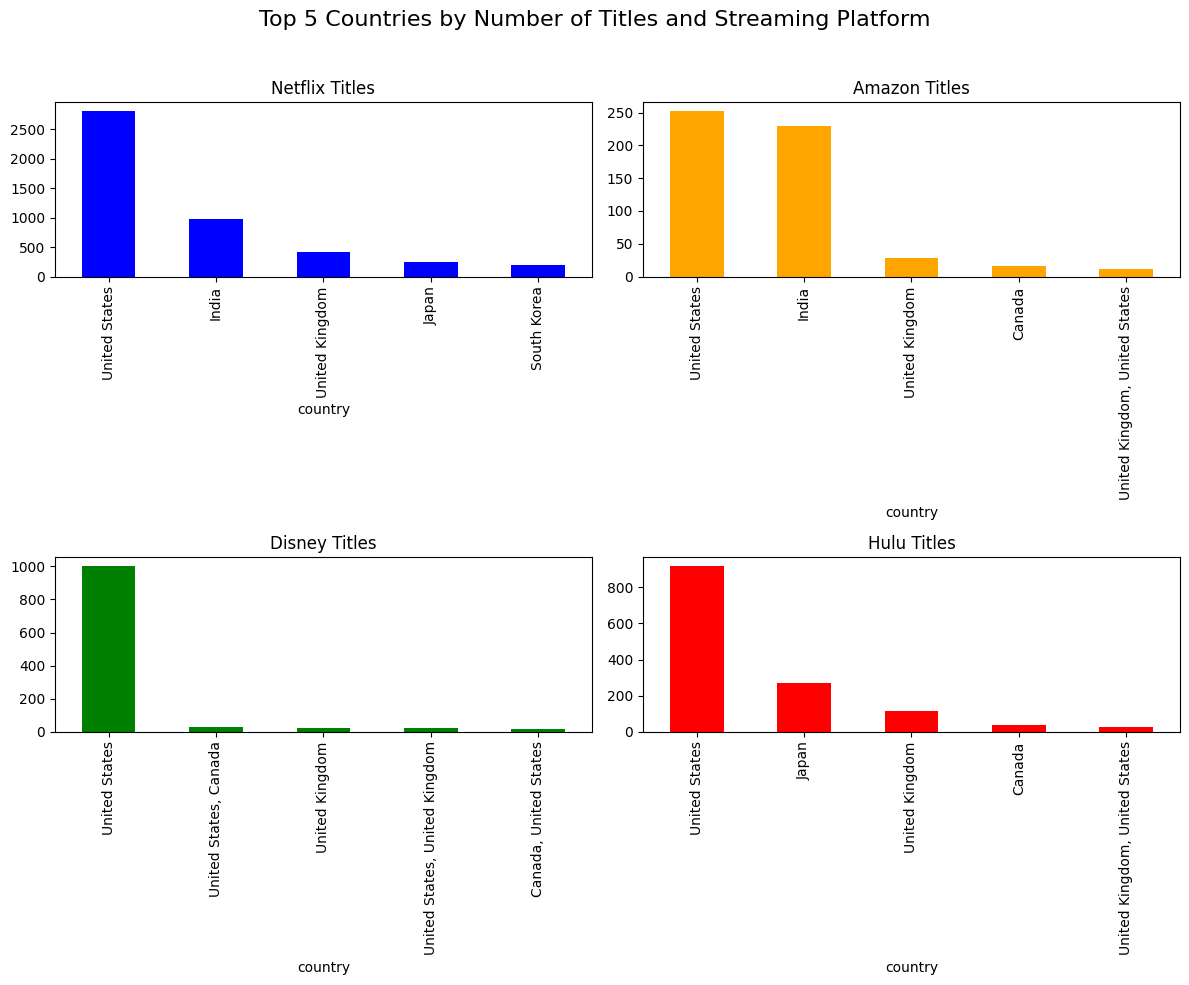

In [5]:
# Streaming Platform # Titles Plotted Together

import numpy as np
import matplotlib.pyplot as plt

# Create separate subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Top 5 Countries by Number of Titles and Streaming Platform', fontsize=16)

# Overlay of all plots
# Filter Out Unknown
df_filtered = df[df['country'] != 'Unknown']
adf_filtered = adf[adf['country'] != 'Unknown']
ddf_filtered = ddf[ddf['country'] != 'Unknown']
hdf_filtered = hdf[hdf['country'] != 'Unknown']

# Plotting Netflix dataframe
country_counts = df_filtered.groupby('country')['title'].count().sort_values(ascending=False)
top_5_countries = country_counts.head(5)
ax = top_5_countries.plot(kind='bar', color='blue', ax=axes[0, 0])
ax.set_title('Netflix Titles')

# Plotting Amazon dataframe
a_country_counts = adf_filtered.groupby('country')['title'].count().sort_values(ascending=False)
top_5_countries_a = a_country_counts.head(5)
ax = top_5_countries_a.plot(kind='bar', color='orange', ax=axes[0, 1])
ax.set_title('Amazon Titles')

# Plotting Disney dataframe
d_country_counts = ddf_filtered.groupby('country')['title'].count().sort_values(ascending=False)
top_5_countries_d = d_country_counts.head(5)
ax = top_5_countries_d.plot(kind='bar', color='green', ax=axes[1, 0])
ax.set_title('Disney Titles')

# Plotting Hulu dataframe
h_country_counts = hdf_filtered.groupby('country')['title'].count().sort_values(ascending=False)
top_5_countries_h = h_country_counts.head(5)
ax = top_5_countries_h.plot(kind='bar', color='red', ax=axes[1, 1])
ax.set_title('Hulu Titles')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()


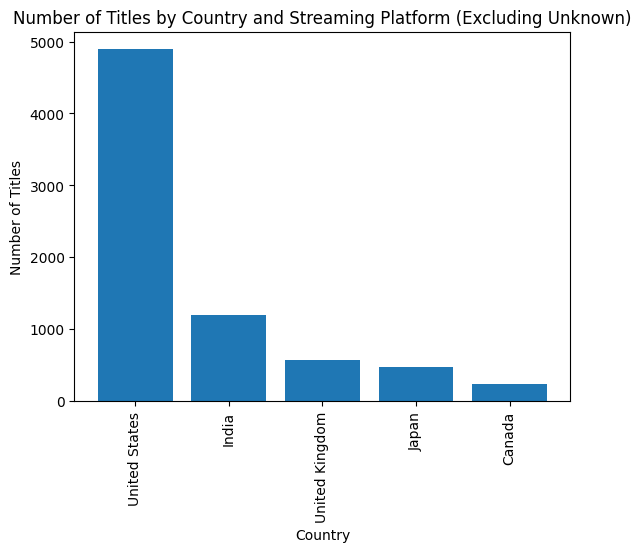

In [6]:
# Plot of Combined Data Sets (no repeated titles)

# Filter Out Unknown
df_filtered = df[df['country'] != 'Unknown']
adf_filtered = adf[adf['country'] != 'Unknown']
ddf_filtered = ddf[ddf['country'] != 'Unknown']
hdf_filtered = hdf[hdf['country'] != 'Unknown']

# Combine country counts from all dataframes
all_countries = pd.concat([df_filtered, adf_filtered, ddf_filtered, hdf_filtered]).groupby('country')['title'].nunique().sort_values(ascending=False)

# Only top 5
top_5_countries = all_countries.head(5)

# Plot
ax = top_5_countries.plot(kind='bar', width=0.8)

plt.title('Number of Titles by Country and Streaming Platform (Excluding Unknown)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

In [7]:
tv_shows_df = df[df['type'] == 'TV Show']

# Convert movie durations to numeric
movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Convert TV show seasons to numeric
tv_shows_df['seasons_count'] = pd.to_numeric(tv_shows_df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Handle multiple countries for TV shows
tv_shows_df['country'] = tv_shows_df['country'].str.split(', ')
exploded_tv_shows_df = tv_shows_df.explode('country')

# Calculate the average number of seasons per country for TV shows
average_tv_shows_duration = exploded_tv_shows_df.groupby('country')['seasons_count'].mean()

# Get average TV show seasons for the United States
us_average_tv_shows_seasons = average_tv_shows_duration.get('United States', 'Not Available')
print("Average TV Show Seasons in United States:", us_average_tv_shows_seasons, "seasons")

# Select top 5 countries based on average TV show seasons
top_5_tv_shows_durations = average_tv_shows_duration.sort_values(ascending=False).head(5)

# If United States is not in the top 5, add it separately
if 'United States' not in top_5_tv_shows_durations.index:
    us_tv_shows_duration = pd.Series(average_tv_shows_duration.get('United States', 'Not Available'), index=['United States'])
    top_5_tv_shows_durations = pd.concat([top_5_tv_shows_durations, us_tv_shows_duration])

# Plotting only the second graph for TV shows
plt.figure(figsize=(10, 6))
top_5_tv_shows_durations.plot(kind='bar', color=['lightblue' if country != 'United States' else 'navy' for country in top_5_tv_shows_durations.index])

plt.title('Average TV Show Seasons by Country (Top 5 and United States)')
plt.xlabel('Country')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()



NameError: name 'movies_df' is not defined

country        listed_in               
India          International Movies        817
               Dramas                      620
United States  Dramas                      591
               Comedies                    524
               Documentaries               411
India          Comedies                    308
United States  Independent Movies          302
               Children & Family Movies    272
               Action & Adventure          249
               TV Comedies                 234
Name: title, dtype: int64


C:\Users\eeerm\AppData\Local\Temp\ipykernel_23132\2426565013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_in'] = df['listed_in'].astype(str).str.split(', ')


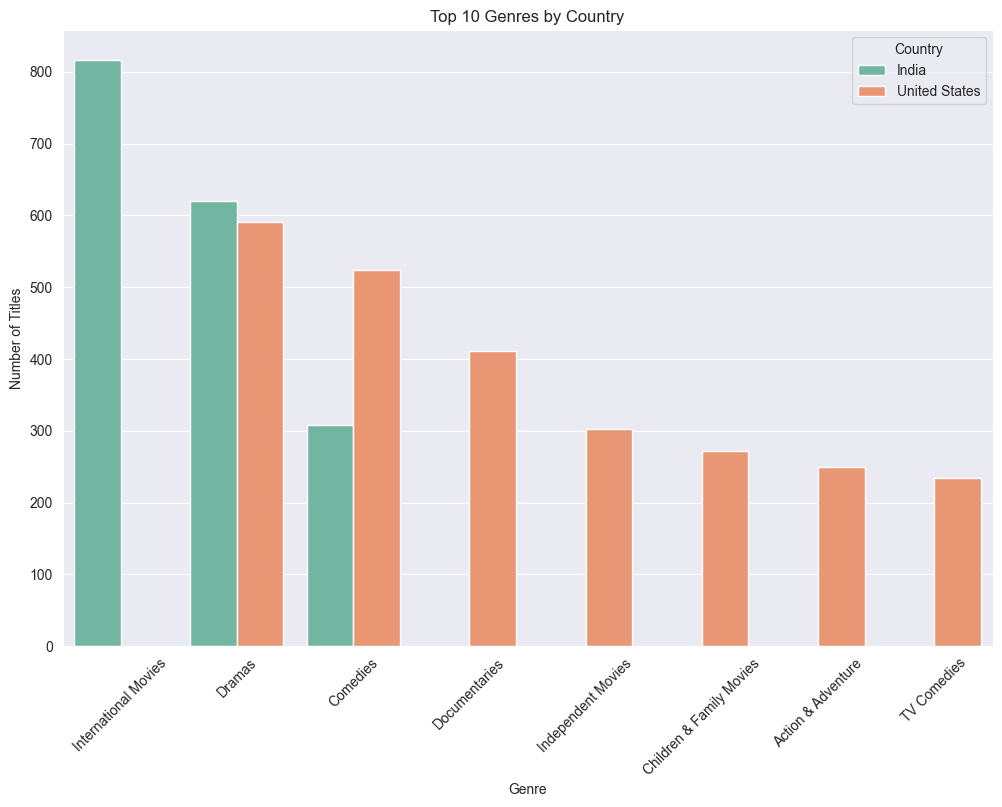

In [ ]:
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')

# Explode the 'listed_in' column
exploded_df = df.explode('listed_in')
genre_by_country = exploded_df.groupby(['country', 'listed_in'])['title'].count().sort_values(ascending=False)

print(genre_by_country.head(10))

top_10_genres = genre_by_country.head(10).reset_index()
plt.figure(figsize=(12, 8))

# Creating a bar plot
sns.barplot(x='listed_in', y='title', hue='country', data=top_10_genres, palette='Set2')

# Adding titles and labels
plt.title('Top 10 Genres by Country')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Country')

# Show the plot
plt.show()




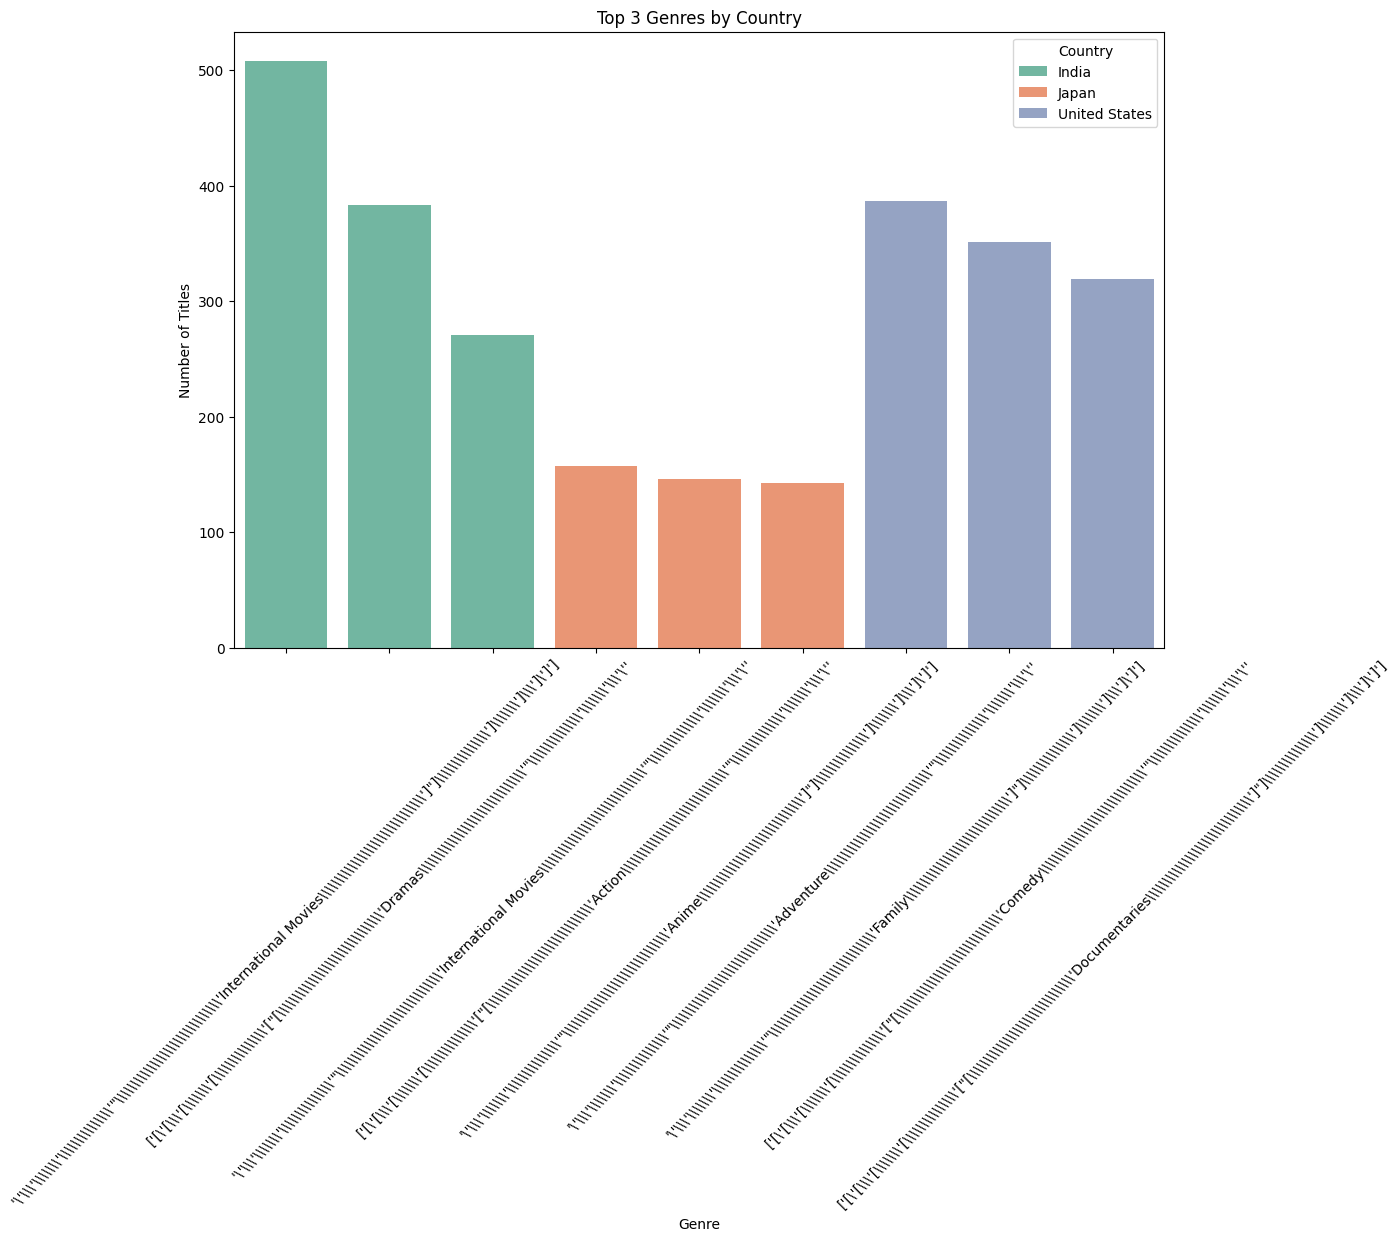

In [18]:
# All Platforms

# Assuming 'all_df' is your DataFrame containing the data
all_df['listed_in'] = all_df['listed_in'].astype(str).str.split(', ')
exploded_df = all_df.explode('listed_in')

# Get the top 5 countries based on the number of titles
top_countries = exploded_df['country'].value_counts().head(3).index

# Filter the DataFrame for the top 5 countries
top_countries_df = exploded_df[exploded_df['country'].isin(top_countries)]

# Group by country and genre, then count the number of titles
genre_by_country = top_countries_df.groupby(['country', 'listed_in'])['title'].count().reset_index()

# Find the top 5 genres for each country
top_genres_by_country = genre_by_country.groupby('country').apply(lambda x: x.nlargest(3, 'title')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='listed_in', y='title', hue='country', data=top_genres_by_country, palette='Set2')

# Adding titles and labels
plt.title('Top 3 Genres by Country')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Country')

# Show the plot
plt.show()


C:\Users\Xabi0\AppData\Local\Temp\ipykernel_10980\1537291146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_in'] = df['listed_in'].astype(str).str.split(', ')


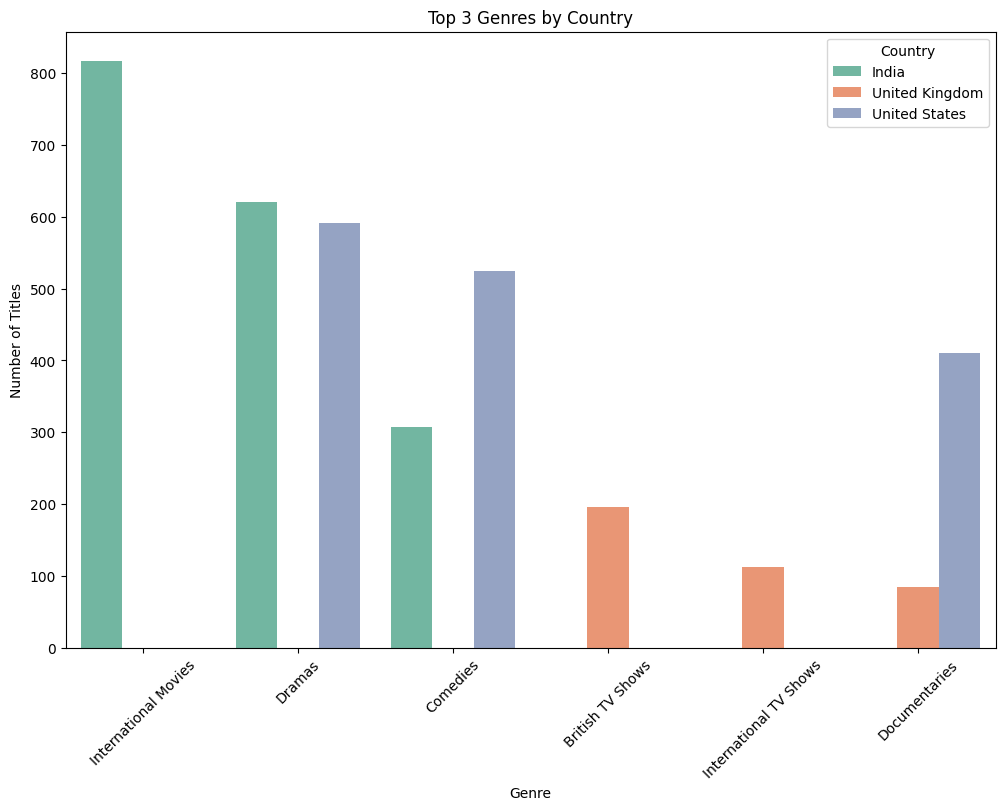

In [19]:
# All Platforms

# Assuming 'all_df' is your DataFrame containing the data
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')
exploded_df = df.explode('listed_in')

# Get the top 5 countries based on the number of titles
top_countries = exploded_df['country'].value_counts().head(3).index

# Filter the DataFrame for the top 5 countries
top_countries_df = exploded_df[exploded_df['country'].isin(top_countries)]

# Group by country and genre, then count the number of titles
genre_by_country = top_countries_df.groupby(['country', 'listed_in'])['title'].count().reset_index()

# Find the top 5 genres for each country
top_genres_by_country = genre_by_country.groupby('country').apply(lambda x: x.nlargest(3, 'title')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='listed_in', y='title', hue='country', data=top_genres_by_country, palette='Set2')

# Adding titles and labels
plt.title('Top 3 Genres by Country')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Country')

# Show the plot
plt.show()

release_year
2018    356
2017    352
2019    351
2020    336
2016    263
       ... 
1968      1
1969      1
1971      1
1985      1
1975      1
Name: count, Length: 69, dtype: int64


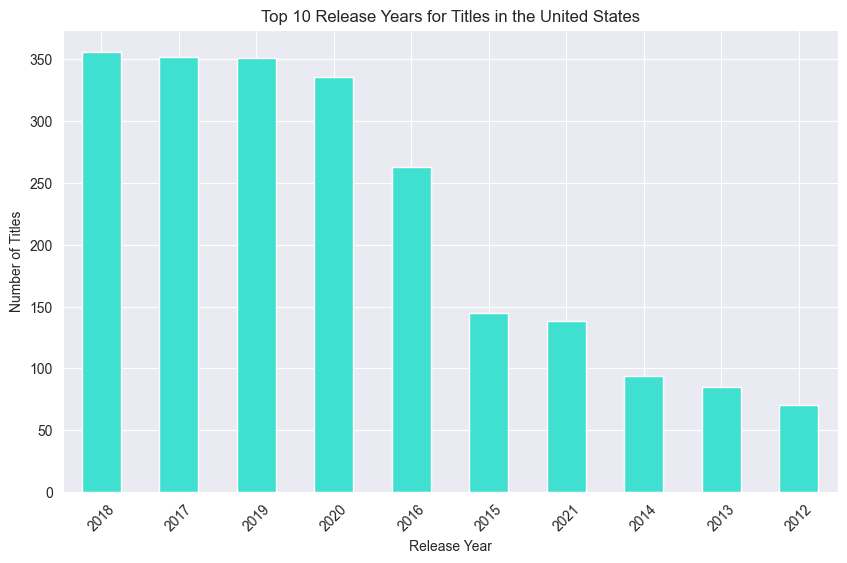

In [ ]:
release_year_distribution = df.groupby('country')['release_year'].value_counts()
print(release_year_distribution.get('United States'))

us_release_years = release_year_distribution['United States']

top_ten_us_release_years = us_release_years.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_ten_us_release_years.plot(kind='bar', color='turquoise')

plt.title('Top 10 Release Years for Titles in the United States')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['cast'] = df['cast'].str.split(', ')
df['director'] = df['director'].str.split(', ')
exploded_df = df.explode('cast')
exploded_df_director = df.explode('director')

cast_trends = exploded_df.groupby('country')['cast'].value_counts()
director_trends = exploded_df_director.groupby('country')['director'].value_counts()

us_cast_trends = cast_trends['United States']
print("Top Casts in United States:")
print(us_cast_trends.head())  # This prints the top 5 casts in the United States


us_director_trends = director_trends['United States']
print("Top Directors in United States:")
print(us_director_trends.head())  # This prints the top 5 directors in the United States


Top Casts in United States:
cast
No Cast              330
Adam Sandler          20
Samuel L. Jackson     19
Fred Tatasciore       17
Molly Shannon         15
Name: count, dtype: int64
Top Directors in United States:
director
Unknown            770
Jay Karas           15
Marcus Raboy        15
Jay Chapman         12
Shannon Hartman      9
Name: count, dtype: int64


C:\Users\eeerm\AppData\Local\Temp\ipykernel_23132\146131082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].str.split(', ')
C:\Users\eeerm\AppData\Local\Temp\ipykernel_23132\146131082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director'] = df['director'].str.split(', ')


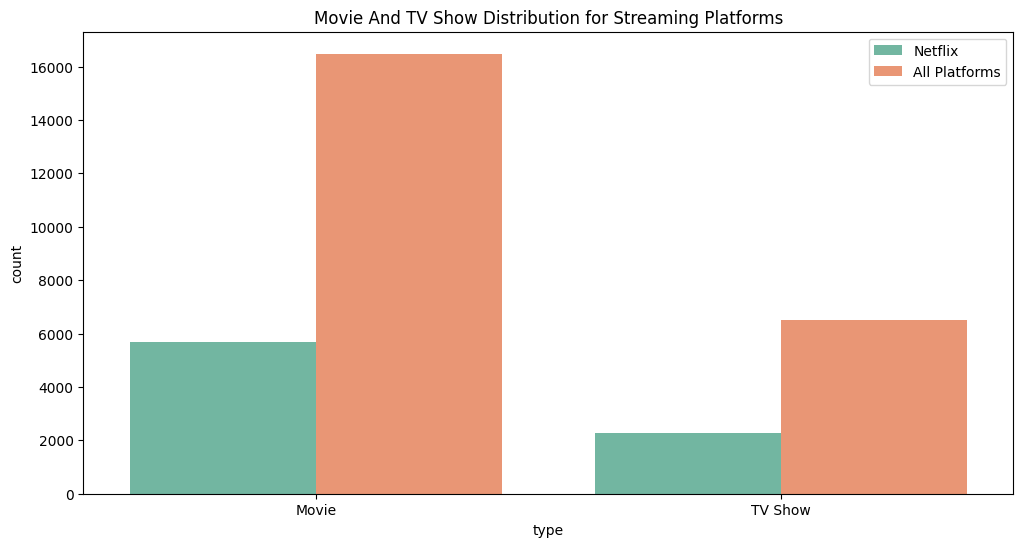

In [10]:
# Movies Vs. Tv Shows
netflix_shows = df[df['type'] == "TV Show"]
netflix_movies = df[df['type'] == "Movie"]


# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Combine the DataFrames for plotting
combined_all_df = pd.concat([df.assign(dataset='Netflix'), all_df.assign(dataset='All Platforms')])

# Plot the combined DataFrame
ax = sns.countplot(x="type", hue="dataset", data=combined_all_df, palette="Set2")
ax.set_title('Movie And TV Show Distribution for Streaming Platforms')
ax.legend(title='')

# Show the combined plot
plt.show()

C:\Users\eeerm\AppData\Local\Temp\ipykernel_23132\999657980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.extract('(\d+)')[0], errors='coerce')
C:\Users\eeerm\AppData\Local\Temp\ipykernel_23132\999657980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['country'] = movies_df['country'].str.split(', ')


country
                103.000000
Afghanistan      84.000000
Albania         105.000000
Algeria         108.333333
Angola          107.000000
                   ...    
Vatican City     96.000000
Venezuela        96.250000
Vietnam         106.285714
West Germany    113.333333
Zimbabwe        103.000000
Name: duration_numeric, Length: 122, dtype: float64
Average Movie Duration in United States: 93.75982532751091 mins


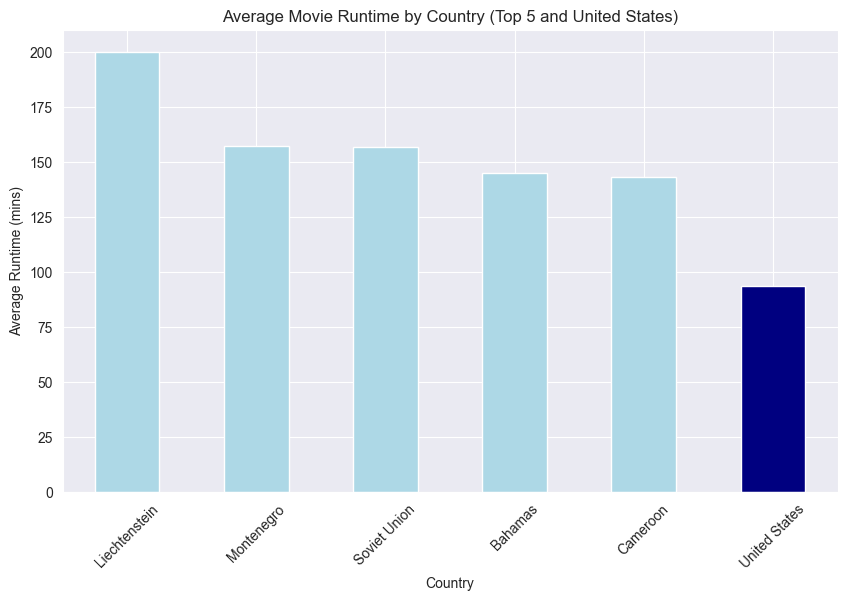

In [ ]:
movies_df = df[df['type'] == 'Movie']
# Convert duration to numeric
movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Split the 'country' column on comma to account for multiple countries
movies_df['country'] = movies_df['country'].str.split(', ')

# Explode the DataFrame to have separate rows for each country associated with a movie
exploded_movies_df = movies_df.explode('country')

# Calculate average movie duration by country
average_movie_duration = exploded_movies_df.groupby('country')['duration_numeric'].mean()
print(average_movie_duration)

# Get average movie duration for the United States
us_average_movie_duration = average_movie_duration.get('United States', 'Not Available')
print("Average Movie Duration in United States:", us_average_movie_duration, "mins")

# Select top 5 countries based on average movie duration
top_5_movie_durations = average_movie_duration.sort_values(ascending=False).head(5)

# If United States is not in the top 5, add it separately
if 'United States' not in top_5_movie_durations.index:
    us_duration = pd.Series(average_movie_duration.get('United States', 'Not Available'), index=['United States'])
    top_5_movie_durations = pd.concat([top_5_movie_durations, us_duration])

# Plotting the graph for movies
plt.figure(figsize=(10, 6))
top_5_movie_durations.plot(kind='bar', color=['lightblue' if country != 'United States' else 'navy' for country in top_5_movie_durations.index])

plt.title('Average Movie Runtime by Country (Top 5 and United States)')
plt.xlabel('Country')
plt.ylabel('Average Runtime (mins)')
plt.xticks(rotation=45)
plt.show()